In [37]:
import sys
import os
import pickle
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.SimulationDomain import SimulationDomain
from electronTransportCode.Material import unitDensityMaterial
from electronTransportCode.SimOptions import KDTestSource
from electronTransportCode.ParticleModel import DiffusionTestParticle
from electronTransportCode.MCParticleTracer import AnalogParticleTracer, KDParticleTracer
from electronTransportCode.MCEstimator import TrackEndEstimator
%matplotlib widget

In [38]:
SIM = False  # True if you want to run the simulation here. False if you want to load in that data from data/

In [39]:
if SIM:
    # Set up simulation domain
    xmax = 15
    ymin = -xmax; ymax = xmax; ybins = 1  # No internal grid cell crossings
    zmin = -xmax; zmax = xmax; zbins = 1
    simDomain = SimulationDomain(ymin, ymax, zmin, zmax, ybins, zbins, material=unitDensityMaterial)

    # Set up initial conditions
    NB_PARTICLES = 30000
    eSource: float = 1.0  # dummy
    SEED: int = 4  # Random number generator seed
    pointSourceSim = KDTestSource(minEnergy=0.0, rngSeed=SEED, eSource=eSource)

    scatteringRate1 = 0.1; scatteringRate2 = 1.0; scatteringRate3 = 10.0
    particle1 = DiffusionTestParticle(Es=scatteringRate1, sp=1.0)
    particle2 = DiffusionTestParticle(Es=scatteringRate2, sp=1.0)
    particle3 = DiffusionTestParticle(Es=scatteringRate3, sp=1.0)

    particleTracerK = AnalogParticleTracer(particle=None, simOptions=pointSourceSim, simDomain=simDomain)
    particleTracerKD = KDParticleTracer(particle=None, simOptions=pointSourceSim, simDomain=simDomain, dS = eSource)  # stepsize is final time!

    TrackEndEstimatorK1 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorK2 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorK3 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')

    TrackEndEstimatorKD1 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorKD2 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')
    TrackEndEstimatorKD3 = TrackEndEstimator(simDomain, nb_particles=NB_PARTICLES, setting='x')

In [40]:
if SIM:
    # Run analog particle tracer
    particleTracerK(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorK1, ), logAmount=3000, particle=particle1)
    particleTracerK(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorK2, ), logAmount=3000, particle=particle2)
    particleTracerK(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorK3, ), logAmount=3000, particle=particle3)

    # Run KD particle tracer
    particleTracerKD(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorKD1, ), logAmount=3000, particle=particle1)
    particleTracerKD(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorKD2, ), logAmount=3000, particle=particle2)
    particleTracerKD(nbParticles=NB_PARTICLES, estimators=(TrackEndEstimatorKD3, ), logAmount=3000, particle=particle3)
else:
    # Load all simulation results from data/
    TrackEndEstimatorK1 = pickle.load(open('data/TrackEndEstimatorK1.pkl', 'rb'))[0]
    TrackEndEstimatorK2 = pickle.load(open('data/TrackEndEstimatorK2.pkl', 'rb'))[0]
    TrackEndEstimatorK3 = pickle.load(open('data/TrackEndEstimatorK3.pkl', 'rb'))[0]
    TrackEndEstimatorKD1 = pickle.load(open('data/TrackEndEstimatorKD1.pkl', 'rb'))[0]
    TrackEndEstimatorKD2 = pickle.load(open('data/TrackEndEstimatorKD2.pkl', 'rb'))[0]
    TrackEndEstimatorKD3 = pickle.load(open('data/TrackEndEstimatorKD3.pkl', 'rb'))[0]

    particleTracerK = pickle.load(open('data/particleTracerK.pkl', 'rb'))
    particleTracerKD = pickle.load(open('data/particleTracerKD.pkl', 'rb'))
    eSource, NB_PARTICLES = pickle.load(open('data/simargv.pkl', 'rb'))


Text(0.5, 1.0, '$\\Sigma_s(x) = 10.0$')

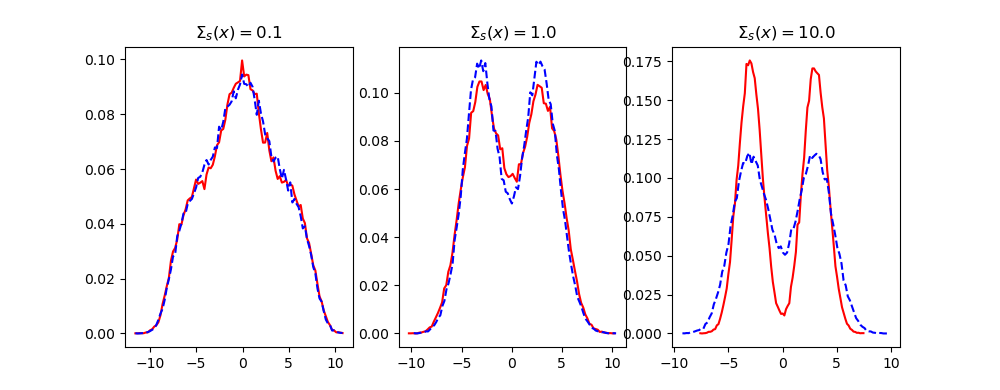

In [41]:
# Plotting
k1Center, k1Data = TrackEndEstimatorK1.getDensityData()
k2Center, k2Data = TrackEndEstimatorK2.getDensityData()
k3Center, k3Data = TrackEndEstimatorK3.getDensityData()
kd1Center, kd1Data = TrackEndEstimatorKD1.getDensityData()
kd2Center, kd2Data = TrackEndEstimatorKD2.getDensityData()
kd3Center, kd3Data = TrackEndEstimatorKD3.getDensityData()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3.9))

ax1.plot(k1Center, k1Data, 'r')
ax1.plot(kd1Center, kd1Data, '--b')
ax1.set_title(f'$\Sigma_s(x) = {scatteringRate1}$')

ax2.plot(k2Center, k2Data, 'r')
ax2.plot(kd2Center, kd2Data, '--b')
ax2.set_title(f'$\Sigma_s(x) = {scatteringRate2}$')

ax3.plot(k3Center, k3Data, 'r')
ax3.plot(kd3Center, kd3Data, '--b')
ax3.set_title(f'$\Sigma_s(x) = {scatteringRate3}$')


In [42]:
particleTracerK.__class__.__name__

'AnalogParticleTracer'